In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



In [258]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [259]:
df=df.drop(['Unnamed: 0'],axis=1)

In [260]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [261]:
df_target=df[['id','cat_duration']]

In [262]:
df_target

id cat_duration
0      87mebub9p4            S
1      osr2jwljor            F
2      lsw9q7uk0j            S
3      0d01nltbrs            S
4      a1vcnhxeij            S
...           ...          ...
86955  7plqriggxp            F
86956  msucfwmlzc            S
86957  omlc9iku7t            S
86958  0k26r3mir0            S
86959  qbxza0xojf            F

[86960 rows x 2 columns]

In [263]:
# 나중에 두가지 그룹으로 분류 하는데 그때 쓰기 위해 
merge_left = pd.merge(df_session,df_target, how='left', left_on='id', right_on='id')



In [264]:
merge_left.isnull().sum()

id                     0
action                 0
device_type            0
secs_elapsed           0
action_type            0
action_detail          0
cat_duration     7902887
dtype: int64

In [265]:
merge_left=merge_left.dropna()

In [266]:
merge_left.isnull().sum()

id               0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
cat_duration     0
dtype: int64

In [267]:
is_s=merge_left['cat_duration']=='S'
is_f=merge_left['cat_duration']=='F'

In [268]:
# 나중에 중요하다. 
subset_s = merge_left[is_s]
subset_f = merge_left[is_f]

In [269]:
# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


In [270]:
list_s=subset_s1.head(50).index

In [271]:
list_f=subset_f1.head(50).index

In [272]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [273]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [274]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['list_your_space', 'listing_recommendations', 'listing_reviews_page',
       'manage_listing', 'signup', 'update_listing_description', 'wishlist'],
      dtype='object')

In [275]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['apply_coupon', 'at_checkpoint', 'message_to_host_focus', 'p4',
       'pending', 'post_checkout_action', 'request_new_confirm_email'],
      dtype='object')

In [276]:
# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


In [277]:
mean_s

9966.683333333332

In [278]:
subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

In [279]:
sub

action_detail  average_divide
-unknown-                           -57894.0       -6.365206
account_notification_settings        -1313.0       -0.142238
account_payout_preferences             112.0        0.010061
account_privacy_settings               -40.0       -0.004533
account_transaction_history           -132.0       -0.014136
...                                      ...             ...
wishlist_content_update              22636.0        1.962591
wishlist_note                          145.0        0.014189
your_listings                         1567.0        0.150674
your_reservations                       13.0        0.001092
your_trips                           -8586.0       -0.899106

[126 rows x 2 columns]

In [280]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [281]:
sub

action_detail  average_divide
-unknown-                     -57894.0       -6.365206
message_post                   -9677.0       -1.039409
message_thread                -20490.0       -2.167892
p3                             45597.0        3.964493
p5                            -19283.0       -2.006092
update_listing                 27834.0        2.765159
view_search_results            50353.0        4.490416
wishlist_content_update        22636.0        1.962591

In [282]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']





In [283]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

In [284]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [285]:
sel_s1=subset_s1.index

In [286]:
sel_f1=subset_f1.index

In [287]:
rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

In [288]:
rem_s1

Index([], dtype='object')

In [289]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [290]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [291]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

id  action_count
0      q20uzzuev8             8
1      1vg2u0ijbj            77
2      twqdhzzonb           301
3      rbtiq1g2xk             1
4      ju5dn2unqw           134
...           ...           ...
28722  vmg2yk300k            90
28723  3kmep45f97            29
28724  hr6a81tfnk            56
28725  ixienr4bq5            52
28726  aihl9y2vq5            82

[28727 rows x 2 columns]

In [292]:
# 아이디별 총 웹 이용시간 
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [293]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [294]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [295]:
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [296]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [297]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [298]:
sessions_new

id  action_count  total_secs          action action_type  \
0      q20uzzuev8             8          86           click       click   
1      1vg2u0ijbj            77         415            show        view   
2      twqdhzzonb           301         489            show        view   
3      rbtiq1g2xk             1           2          create      submit   
4      ju5dn2unqw           134         472  search_results        view   
...           ...           ...         ...             ...         ...   
28722  vmg2yk300k            90         319            show        view   
28723  3kmep45f97            29         130            show        view   
28724  hr6a81tfnk            56         333            edit        view   
28725  ixienr4bq5            52         149            show        view   
28726  aihl9y2vq5            82         328          update        view   

             action_detail      device_type  
0             message_post           iPhone  
1                       p3      Mac Desktop  
2             user_profile           iPhone  
3                   signup        -unknown-  
4      view_search_results  Windows Desktop  
...                    ...              ...  
28722            -unknown-  Windows Desktop  
28723            dashboard      Mac Desktop  
28724         edit_profile  Windows Desktop  
28725            -unknown-      Mac Desktop  
28726       update_listing  Windows Desktop  

[28727 rows x 7 columns]

In [299]:
union = list(set().union(final_S_detail,final_F_detail))


In [300]:
li_1=[]
for i in union:
    li_1.append('action_detail_'+i)

In [301]:
li_1.append('action_detail_view_search_results')

In [302]:
li_1.remove('action_detail_view_search_result')

In [303]:
df_d=df_d[li_1]

In [304]:
session_final= pd.merge(sessions_new,df_d, how='left', left_on='id', right_on=df_d.index)

In [305]:
session_final.isnull().sum()


id                                       0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_detail_message_post               0
action_detail_p1                         0
action_detail_update_user_profile        0
action_detail_profile_verifications      0
action_detail_cancellation_policies      0
action_detail_your_trips                 0
action_detail_create_phone_numbers       0
action_detail_wishlist_content_update    0
action_detail_pending                    0
action_detail_message_thread             0
action_detail_update_listing             0
action_detail_view_search_results        0
dtype: int64

In [335]:
# 타켓 밸류와 연관있는 칼럼 제거
df=df.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)


KeyError: "['timestamp_first_active' 'tfa_date' 'duration' 'date_account_created'] not found in axis"

In [338]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

df=df.drop(['date_first_booking'],axis=1)

KeyError: "['date_first_booking'] not found in axis"

In [339]:
# 디바이스 타입은 이미 따로 해놨으니 필요없음 
df=df.drop(['first_device_type'],axis=1)

KeyError: "['first_device_type'] not found in axis"

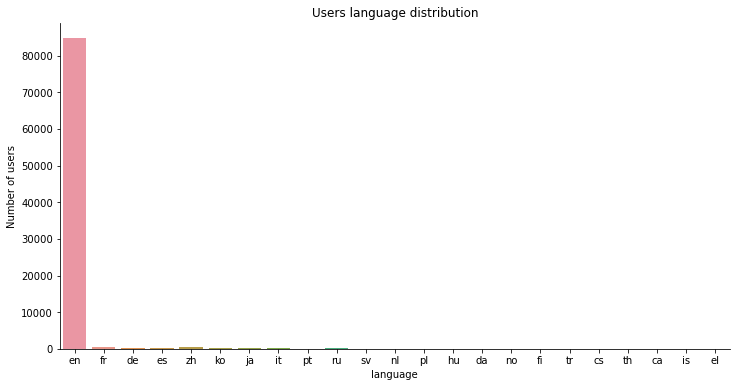

In [340]:
# country 변수 추가 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



merge_c = pd.merge(df,df_country, how='left', left_on='country_destination', right_on='country_destination')




merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)


import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [341]:
merge_c.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2'],
      dtype='object')

In [342]:
merge_final = pd.merge(merge_c,session_final, how='inner',on='id')



In [343]:
merge_final.isnull().sum()

id                                       0
gender                                   0
age                                      0
signup_method                            0
signup_flow                              0
affiliate_channel                        0
affiliate_provider                       0
first_affiliate_tracked                  0
signup_app                               0
first_browser                            0
country_destination                      0
cat_duration                             0
distance_km                              0
destination_km2                          0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_deta

In [344]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action', 'action_type', 'action_detail', 'device_type',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [345]:
merge_final=merge_final.drop(['action_detail','country_destination'],axis=1)

In [346]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration', 'distance_km',
       'destination_km2', 'action_count', 'total_secs', 'action',
       'action_type', 'device_type', 'action_detail_user_listings',
       'action_detail_p5', 'action_detail_p3', 'action_detail_message_post',
       'action_detail_p1', 'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [347]:
merge_final

id  gender        age signup_method  signup_flow  \
0      4rvqpxoh3h    MALE  36.048687         basic           25   
1      xwxei6hdk4  FEMALE  32.000000      facebook            0   
2      awiurksqr3  FEMALE  32.000000      facebook            0   
3      jrqykh9y8x  FEMALE  27.000000      facebook            0   
4      s9xrwtyzsq    MALE  30.000000         basic            0   
...           ...     ...        ...           ...          ...   
25075  7plqriggxp  FEMALE  55.000000         basic            0   
25076  msucfwmlzc    MALE  43.000000         basic            0   
25077  omlc9iku7t  FEMALE  34.000000         basic            0   
25078  0k26r3mir0  FEMALE  36.000000         basic            0   
25079  qbxza0xojf  FEMALE  23.000000         basic            0   

      affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0                direct             direct               untracked        iOS   
1                   seo             google                  linked        Web   
2                direct             direct               untracked        Web   
3                   seo             google                  linked        Web   
4             sem-brand             google                     omg        Web   
...                 ...                ...                     ...        ...   
25075         sem-brand             google                     omg        Web   
25076            direct             direct               untracked        Web   
25077            direct             direct                  linked        Web   
25078         sem-brand             google                  linked        Web   
25079         sem-brand             google                     omg        Web   

       first_browser  ... action_detail_update_user_profile  \
0          -unknown-  ...                                 0   
1      Mobile Safari  ...                                 0   
2      Mobile Safari  ...                                 0   
3             Chrome  ...                                 0   
4      Mobile Safari  ...                                 1   
...              ...  ...                               ...   
25075             IE  ...                                 0   
25076        Firefox  ...                                 0   
25077         Chrome  ...                                 0   
25078         Safari  ...                                 0   
25079             IE  ...                                 0   

       action_detail_profile_verifications  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        4   
...                                    ...   
25075                                    0   
25076                                    0   
25077                                    0   
25078                                    0   
25079                                    0   

       action_detail_cancellation_policies  action_detail_your_trips  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   
3                                        0                         1   
4                                        0                         1   
...                                    ...                       ...   
25075                                    0                         0   
25076                                    2                         0   
25077                                    0                         0   
25078                                    0                         0   
25079                                    0                         0   

       action_detail_create_phone_numbers  \
0                

In [348]:
catvar=['gender', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration','action', 'action_type', 'device_type']

In [349]:
# 더미 데이터 
for c in catvar:
    temp=pd.get_dummies(merge_final[c],prefix=c, drop_first=True)
    merge_final=pd.concat((merge_final,temp),axis=1)

merge_final=merge_final.drop(catvar,axis=1)


In [350]:
merge_final=merge_final.drop(['id'],axis=1)

In [351]:
target=merge_final[['cat_duration_S']]

In [352]:
merge_final=merge_final.drop(['cat_duration_S'],axis=1)

In [353]:
target

cat_duration_S
0                   0
1                   1
2                   0
3                   1
4                   0
...               ...
25075               0
25076               1
25077               1
25078               1
25079               0

[25080 rows x 1 columns]

In [354]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [355]:
merge_final.columns

Index(['age', 'distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       ...
       'device_type_Blackberry', 'device_type_Chromebook',
       'device_type_Linux Desktop', 'device_type_Mac Desktop',
       'device_type_Tablet', 'device_type_Windows Desktop',
       'device_type_Windows Phone', 'device_type_iPad Tablet',
       'device_type_iPhone', 'device_type_iPodtouch'],
      dtype='object', length=213)

In [356]:
merge_final['const']=0

In [357]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools


def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}


def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])


Forward_best_model = forward_model(merge_final,target.values)


Processed  213 models on 1 predictors in 0.7722201347351074
Selected predictors: ['age', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f77460650a0>
Processed  212 models on 2 predictors in 0.8947567939758301
Selected predictors: ['age', 'action_detail_pending', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bd8cf40>
Processed  211 models on 3 predictors in 1.0191700458526611
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773d172430>
Processed  210 models on 4 predictors in 1.165522813796997
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bda2430>
Processed  209 models on 5 predictors in 1.314728021621704
Selected predi

Processed  194 models on 20 predictors in 4.2526421546936035
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bd87760>
Processed  193 models on 21 predictors in 5.24494194984436
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_

Processed  184 models on 30 predictors in 6.947682857513428
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772b

Processed  176 models on 38 predictors in 8.167249917984009
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  169 models on 45 predictors in 8.60824966430664
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device_

Processed  163 models on 51 predictors in 9.029871940612793
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  157 models on 57 predictors in 9.436615943908691
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  152 models on 62 predictors in 11.613710165023804
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  147 models on 67 predictors in 12.701038122177124
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  142 models on 72 predictors in 11.429939031600952
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  138 models on 76 predictors in 14.02570390701294
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  134 models on 80 predictors in 13.19763994216919
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  130 models on 84 predictors in 15.096880912780762
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  126 models on 88 predictors in 12.875076055526733
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  122 models on 92 predictors in 17.800143241882324
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  118 models on 96 predictors in 13.415124893188477
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

In [358]:
Forward_best_model.summary()


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                 -34.869
Model:                            OLS   Adj. R-squared (uncentered):            -35.004
Method:                 Least Squares   F-statistic:                             -258.4
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        1.00
Time:                        19:49:43   Log-Likelihood:                         -14393.
No. Observations:               25080   AIC:                                  2.897e+04
Df Residuals:                   24986   BIC:                                  2.974e+04
Df Model:                          94                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
age                                             -0.0008      0.000     -2.630      0.009      -0.001      -0.000
action_detail_pending                           -0.3407      0.007    -46.870      0.000      -0.355      -0.326
affiliate_channel_direct                         0.3161      0.013     24.887      0.000       0.291       0.341
affiliate_provider_google                        0.6372      0.026     24.668      0.000       0.587       0.688
affiliate_provider_other                         0.6702      0.043     15.761      0.000       0.587       0.754
action_detail_create_phone_numbers              -0.0450      0.004    -12.355      0.000      -0.052      -0.038
action_detail_update_listing                     0.0068      0.001     10.953      0.000       0.006       0.008
affiliate_provider_facebook                      0.6198      0.039     15.790      0.000       0.543       0.697
affiliate_provider_bing                          0.6176      0.037     16.582      0.000       0.545       0.691
action_detail_message_post                      -0.0132      0.002     -8.469      0.000      -0.016      -0.010
action_identity                                 -0.1907      0.024     -7.831      0.000      -0.238      -0.143
action_ajax_photo_widget_form_iframe            -0.2227      0.028     -7.917      0.000      -0.278      -0.168
affiliate_provider_padmapper                     0.8732      0.079     11.037      0.000       0.718       1.028
signup_method_facebook                           0.0422      0.007      6.064      0.000       0.029       0.056
affiliate_provider_yahoo                         0.7178      0.088      8.146      0.000       0.545       0.891
signup_app_iOS                                   0.0495      0.020      2.523      0.012       0.011       0.088
action_detail_wishlist_content_update            0.0029      0.000      8.025      0.000       0.002       0.004
total_secs                                      -0.0002   2.24e-05     -7.812      0.000      -0.000      -0.000
action_update                                    0.2108      0.027      7.766      0.000       0.158       0.264
action_search_results                            0.0588      0.012      4.804      0.000       0.035       0.083
distance_km                                   5.407e-06   8.71e-07      6.207      0.000     3.7e-06    7.11e-06
action_show                                      0.0199      0.008      2.483      0.013       0.004       0.036
action_detail_cancellation_policies             -0.0218      0.004     -5.738      0.000      -0.029      -0.014
affiliate_provider_email-marketing            

In [361]:
sel_FW1=list(Forward_best_model.params.index)


In [362]:
sel_FW1

['age',
 'action_detail_pending',
 'affiliate_channel_direct',
 'affiliate_provider_google',
 'affiliate_provider_other',
 'action_detail_create_phone_numbers',
 'action_detail_update_listing',
 'affiliate_provider_facebook',
 'affiliate_provider_bing',
 'action_detail_message_post',
 'action_identity',
 'action_ajax_photo_widget_form_iframe',
 'affiliate_provider_padmapper',
 'signup_method_facebook',
 'affiliate_provider_yahoo',
 'signup_app_iOS',
 'action_detail_wishlist_content_update',
 'total_secs',
 'action_update',
 'action_search_results',
 'distance_km',
 'action_show',
 'action_detail_cancellation_policies',
 'affiliate_provider_email-marketing',
 'affiliate_provider_facebook-open-graph',
 'action_detail_view_search_results',
 'action_personalize',
 'action_complete_status',
 'affiliate_provider_gsp',
 'affiliate_provider_naver',
 'action_authenticate',
 'action_active',
 'device_type_Android App Unknown Phone/Tablet',
 'device_type_Android Phone',
 'action_type_view',
 'act

In [413]:
x=merge_final[sel_FW1]

In [414]:
y=target.values

In [415]:
x

age  action_detail_pending  affiliate_channel_direct  \
0      36.048687                      0                         1   
1      32.000000                      0                         0   
2      32.000000                      0                         1   
3      27.000000                      0                         0   
4      30.000000                      1                         0   
...          ...                    ...                       ...   
25075  55.000000                      1                         0   
25076  43.000000                      0                         1   
25077  34.000000                      0                         1   
25078  36.000000                      0                         0   
25079  23.000000                      0                         0   

       affiliate_provider_google  affiliate_provider_other  \
0                              0                         0   
1                              1                         0   
2                              0                         0   
3                              1                         0   
4                              1                         0   
...                          ...                       ...   
25075                          1                         0   
25076                          0                         0   
25077                          0                         0   
25078                          1                         0   
25079                          1                         0   

       action_detail_create_phone_numbers  action_detail_update_listing  \
0                                       0                           0.0   
1                                       0                           0.0   
2                                       0                           0.0   
3                                       1                           0.0   
4                                       2                           0.0   
...                                   ...                           ...   
25075                                   0                           0.0   
25076                                   0                           0.0   
25077                                   0                           0.0   
25078                                   0                           4.0   
25079                                   0                           0.0   

       affiliate_provider_facebook  affiliate_provider_bing  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
25075                            0                        0   
25076                            0                        0   
25077                            0                        0   
25078                            0                        0   
25079                            0                        0   

       action_detail_message_post  ...  affiliate_channel_seo  \
0                             0.0  ...                      0   
1                             2.0  ...                      1   
2                             1.0  ...                      0   
3                            42.0  ...                      1   
4                             1.0  ...                      0   
...                           ...  ...                    ...   
25075                         1.0  ...                      0   
25076                         0.0  ...                      0   
25077                         0.0  ...                      0   
25078                         2.0  ...                      0   
25079                         0.0  ...                      0   



In [418]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

fitted = std_scaler.fit(x)
output = std_scaler.transform(x)
output = pd.DataFrame(output, columns=x.columns, index=list(x.index.values))
output.head()

age  action_detail_pending  affiliate_channel_direct  \
0  0.080177              -0.523840                  0.742372   
1 -0.327513              -0.523840                 -1.347033   
2 -0.327513              -0.523840                  0.742372   
3 -0.830998              -0.523840                 -1.347033   
4 -0.528907               1.604791                 -1.347033   

   affiliate_provider_google  affiliate_provider_other  \
0                  -0.645344                 -0.188662   
1                   1.549561                 -0.188662   
2                  -0.645344                 -0.188662   
3                   1.549561                 -0.188662   
4                   1.549561                 -0.188662   

   action_detail_create_phone_numbers  action_detail_update_listing  \
0                           -0.483894                     -0.246064   
1                           -0.483894                     -0.246064   
2                           -0.483894                     -0.246064   
3                            0.660802                     -0.246064   
4                            1.805497                     -0.246064   

   affiliate_provider_facebook  affiliate_provider_bing  \
0                    -0.104125                -0.102747   
1                    -0.104125                -0.102747   
2                    -0.104125                -0.102747   
3                    -0.104125                -0.102747   
4                    -0.104125                -0.102747   

   action_detail_message_post  ...  affiliate_channel_seo  \
0                   -0.523286  ...              -0.230185   
1                    0.414947  ...               4.344332   
2                   -0.054169  ...              -0.230185   
3                   19.179607  ...               4.344332   
4                   -0.054169  ...              -0.230185   

   action_calendar_tab_inner2  signup_flow_12  first_browser_Opera Mini  \
0                   -0.063588       -0.194919                 -0.006315   
1                   -0.063588       -0.194919                 -0.006315   
2                   -0.063588       -0.194919                 -0.006315   
3                   -0.063588       -0.194919                 -0.006315   
4                   -0.063588       -0.194919                 -0.006315   

   first_browser_Maxthon  action_payment_methods  \
0               -0.00893               -0.034606   
1               -0.00893               -0.034606   
2               -0.00893               -0.034606   
3               -0.00893               -0.034606   
4               -0.00893               -0.034606   

   action_ajax_google_translate  action_read_policy_click  \
0                     -0.006315                 -0.006315   
1                     -0.006315                 -0.006315   
2                     -0.006315                 -0.006315   
3                     -0.006315                 -0.006315   
4                     -0.006315                 -0.006315   

   affiliate_provider_direct  const  
0                   0.742372    0.0  
1                  -1.347033    0.0  
2                   0.742372    0.0  
3                  -1.347033    0.0  
4                  -1.347033    0.0  

[5 rows x 96 columns]

In [412]:
output

age  action_detail_pending  affiliate_channel_direct  \
0      36.048687                      0                         1   
1      32.000000                      0                         0   
2      32.000000                      0                         1   
3      27.000000                      0                         0   
4      30.000000                      1                         0   
...          ...                    ...                       ...   
25075  55.000000                      1                         0   
25076  43.000000                      0                         1   
25077  34.000000                      0                         1   
25078  36.000000                      0                         0   
25079  23.000000                      0                         0   

       affiliate_provider_google  affiliate_provider_other  \
0                              0                         0   
1                              1                         0   
2                              0                         0   
3                              1                         0   
4                              1                         0   
...                          ...                       ...   
25075                          1                         0   
25076                          0                         0   
25077                          0                         0   
25078                          1                         0   
25079                          1                         0   

       action_detail_create_phone_numbers  action_detail_update_listing  \
0                                       0                           0.0   
1                                       0                           0.0   
2                                       0                           0.0   
3                                       1                           0.0   
4                                       2                           0.0   
...                                   ...                           ...   
25075                                   0                           0.0   
25076                                   0                           0.0   
25077                                   0                           0.0   
25078                                   0                           4.0   
25079                                   0                           0.0   

       affiliate_provider_facebook  affiliate_provider_bing  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
25075                            0                        0   
25076                            0                        0   
25077                            0                        0   
25078                            0                        0   
25079                            0                        0   

       action_detail_message_post  ...  affiliate_channel_seo  \
0                             0.0  ...                      0   
1                             2.0  ...                      1   
2                             1.0  ...                      0   
3                            42.0  ...                      1   
4                             1.0  ...                      0   
...                           ...  ...                    ...   
25075                         1.0  ...                      0   
25076                         0.0  ...                      0   
25077                         0.0  ...                      0   
25078                         2.0  ...                      0   
25079                         0.0  ...                      0   



In [419]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(output, y, test_size=0.3)
   
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# 예측
y_pred = forest.predict(x_test)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

<ipython-input-419-88417cc5ec1c>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


정확도 : 0.7361775651249336


In [389]:
x.to_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/final_x.csv")

In [391]:
target.to_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/final_y.csv")

In [377]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(x.values, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(x)

/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 100
Confirmed: 	28
Tentative: 	6
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 100
Confirmed: 	28
Tentative: 	6
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 100
Confirmed: 	28
Tentative: 	5
Rejected: 	63


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 100
Confirmed: 	28
Tentative: 	5
Rejected: 	63


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	68


BorutaPy finished running.

Iteration: 	44 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	68


TypeError: '(slice(None, None, None), array([ True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]))' is an invalid key

In [378]:
feat_selector.ranking_


array([ 1,  1, 23, 20,  9,  1,  1, 28, 31,  1,  1,  1, 33,  1, 49,  1,  1,
        1,  1,  2,  4,  1,  1, 47, 54,  1,  6, 18, 67, 49,  6,  1, 19, 12,
        1,  1,  1,  1,  1, 15, 38, 41,  3,  8, 30,  8,  1, 18,  1,  1, 33,
       10, 67, 44, 50, 36, 14, 35, 38,  1, 11, 21, 13, 22, 53, 46, 34, 40,
        1, 25, 51, 64, 25, 56, 42, 64,  1,  1, 61, 64, 59, 52, 27, 56, 29,
       45, 16, 44,  2, 57, 64, 39, 61, 59, 25, 67])

In [382]:
feat_selector.support_


array([ True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [383]:
li_final=list(feat_selector.support_)

In [384]:
li_final

[True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [387]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))

import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

get_clf_eval(y_test, preds)        


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'